# 7. Predavanje - modul os
* Provjera zadaća i komentiranje koda
* Što kada treba import iz filea koji nije u našem folderu? (referenciranje i lociranje fileova)
* Veći naglasak na dokumentaciju i guglanje: https://docs.python.org/3/library/os.html -> stack overflow + chatgpt
* Pripremiti i fileove na kojima će se raditi (evidentiranje sati)
* Zadaci za zadaću:
    - Nađi duplikate slika.jpg slika (1).jpg ...
    - Nađi duplikate po veličini


# Moduli os, shutil, pathlib

Do sada smo govorili i radili u kontekstu programiranja samog za sebe. No mi često želimo programiranjem utjecati na stvari van programa u kojem programiramo. Jedan primjer toga je utjecanje na funkcioniranje ostatka vlastitog kompa - bilo procesa na njemu, bilo fileova.

## Moduli

Za to nam pomažu tri ugrađena modula: os, shutil i pathlib.

* os
    - modul koji opisuje interakciju s operativnim sustavom
        - **interakcija s environment varijablama**
        - kontrola procesa
        - otvaranje i pisanje fileova
        - mijenjanje dopuštenja na fileovima
        - navigacija po folderima
        - kreiranje foldera
        - kontrola patha
    - druga dva modula bolje rješavaju pitanja fileova i patha
* shutil
    - shell utilities
    - modul koji emulira ponašanje shella
        - **kopiranje fileova i foldera**
        - brisanje foldera
* pathlib
    - library (lib) za kontrolu lokacija (path)
    - modul koji omogućuje kontrolu pathova ne bolji način
        - **navigacija patha**
        - **informacije o pathu**
        - **analiza patha**
        - **generiranje lista**
        - **kreiranje i brisanje foldera**

Pošto su u pitanju 3 modula s HRPOM funkcija (os: 200+, shutil: 50+, pathlib: 100+), nema smisla prolaziti kroz sve. Stoga ćemo prvo pogledati kako izgleda dokumentacija, kako čitati dokumentaciju i snaći se u guglanju, a onda proći kroz selekciju korisnik funkcija.

## Dokumentacija

Službenu python dokumentaciju moguće je naći jednostavno guglajući "python <modul_name>" i trebao bi biti prvi link. OVdje su sva tri navedena.
https://docs.python.org/3/library/os.html
https://docs.python.org/3/library/shutil.html
https://docs.python.org/3/library/pathlib.html

Generalno govoreći, dokumentacija za python je pisana tako da u početku imate opis samog modula i onda upute za svaku funkciju (uz neke i primjeri). Na primjer:
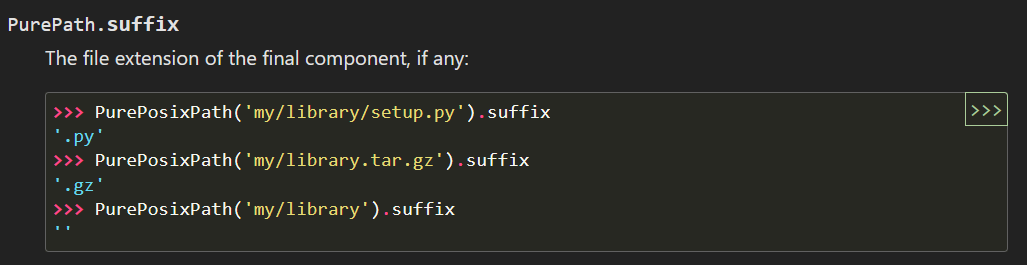

Kod dokumentacije je bitno čitati zapis funkcije. Tamo možemo vidjeti informacije o parametrima funkcija (jesu li pozicijski, keyword, imaju li defaulte ili ne). Nekoliko primjera:
* os.putenv(key, value, /)
    - / predstavlja limit između samo-pozicijskih (ispred) i pozicijsko-keyword argumenata (iza)
    - key i value su argumenti koji su pozicijski
        + os.putenv('test', 'value')
        - os.putenv(**key=**'test', **value=**'value')
* os.open(path, flags, mode=0o777, *, dir_fd=None)
    - * predstavlja limit između pozicijsko-keyword (ispred) i samo-keyword argumenata (iza)
    - path, flags i mode se mogu dati sa ili bez naziva, no dir_fd mora biti s nazivom:
        + os.open('/tmp/file.txt', 'w', 0o221, **dir_fd=**71)
        - os.open('/tmp/file.txt', 'w', 0o221, 71)
    - path i flags moraju biti dani, a mode i dir_fd imaju vrijednosti koje mogu, ali ne moraju biti dane:
        + os.open('/tmp/file.txt', **'w'**)
        - os.open('/tmp/file.txt')
* os.fdopen(fd, *args, **kwargs)
    - *args i **kwargs predstavlja nedefiniranu listu pozicijskih i keyword argumenata
        + os.fdopen('/tmp/file.txt', 'r', 'text', name='somefile', content='some_stuff')
        + os.fdopen('/tmp/file.txt')

## Korisne funkcije

### os

* os.environ
    - os.environ predstavlja rječnik u kojem se nalaze vrijednosti environmental varijabli
    - definira ga operativni sustav, ali i korisnik
    - sadržava bitne veličine koje koristi OS ili ih korisnik sprema za univerzalni pristup
        - email i password kojeg vaš program koristi
        - tokeni za pristup servisima
        - univerzalni parametri za funkcioniranje programa
    os.environ['PASSWORD'] = 'Password123!'
    token = os.environ['SPOTIFY_API_TOKEN']

### shutil

* shutil.copy(src, dest)
    - Kopira file s položaja *src* na položaj *dest*.
    - *dest* može sadržavati direktorij.
    - Ukoliko file postoji, prebriše ga
* shutil.copytree(src, dest, *, dirs_exist_ok=False, ...)
    - Kopira cijeli filder s položaja *src* na položaj *dest*
    - *dirs_exit_ok*=True omogućuje da prebriše postojeći direktorij
* shutil.move(src, dest)
    - Premješta file ili folder s položaja *src* na položaj *dest*
* shutil.rmtree(src, ...)
    - Briše folder na mjestu *src*
* shutil.disk_usage(path)
    - Ispisuje ukupnu veličinu, zauzetost i slobodni prostor na disku kojem pripada lokacija *path*

### pathlib

Pathlib ima hrpu funkcija koje su korisne za baratanje pathovima. Ovdje ćemo ih vidjeti grupirane po sličnoj logici, poredane po korisnosti za operacije.


#### Kreiranje patha

* pathlib.Path(string, *strings)
    - Pretvori string u path objekt.
    - Moguće davati nekoliko stringova, sve ih spoji kao zasebne foldere jedan iza drugoga.
    - Nakon kreiranja path objekta, ostali dijelovi se mogu dodati ovako: **pathlib.Path('/home') / 'tnazif' / 'projects'**

U ostalim funkcijama dio gdje piše **pathlib.Path** zamijenimo sa varijablom koja sadrži naš path. 

* pathlib.Path.joinpath(*path_segments)
    - Alternativni način za formiranje patha

#### Kreiranje i brisanje fileova i foldera

* pathlib.Path.touch(exist_ok=True, ...)
    - Kreira file na ovom pathu.
    - Ako je *exist_ok*=True ne javlja grešku ako file postoji i ne prebriše ga.
* pathlib.Path.unlink(missing_ok=False)
    - Obriše file
    - Ako je *missing_ok*=True ne javlja grešku ako file ne postoji.
* pathlib.Path.mkdir(parents=False, exist_ok=False, ...)
    - Kreira dani folder.
    - Ako je *parents*=True, kreira sve foldere koje nedostaju.
    - Ako je *exist_ok*=True, ne javlja grešku ako folder već postoji.
* pathlib.Path.rmdir()
    - Ukloni dani folder.
    - Folder mora biti prazan.

#### Micanje fileova i foldera

* pathlib.Path.rename(target)
    - Promjeni ime danom pathu u *target*.
    - Na Linuxu i Macu prebriše file, na Windowsu javi error. 
* pathlib.Path.replace
    - Promjeni ime danom pathu u *target*.
    - Uvijek prebriše file.

#### Navigiranje po dijelu patha

* pathlib.Path.parent
    - Vrati path prethodnog foldera u hijerarhiji.
* pathlib.Path.parents
    - Vrati path svih prethodnih foldera u hijerarhiji.
* pathlib.Path.name
    - Vrati ime filea (s ekstenzijama) ili ime foldera.
* pathlib.Path.suffix
    - Vrati zadnju ekstenziju filea. Ako je folder, vrati prazan tekst.
* pathlib.Path.suffixes
    - Vrati listu svih ekstenzija filea (npr file.tar.gz). Ako je folder, vrati praznu listu.
* pathlib.Path.stem
    - Vrati ime filea bez ekstenzija.

#### Dobivanje sadržaja

* pathlib.Path.iterdir
    - Vrati *generator* (slično kao lista) fileova u direktoriju na kojeg pokazuje path.
    - Generator se može koristiti u for petlji, ali sam ne sadrži podatke nego način da ih se dobije.
    - Generator se može pretvoriti u listu.
* pathlib.Path.glob(pattern, *, case_sensitive=None)
    - Vrati *generator* fileova koji odgovaraju patternu.
    - *case_sensitive*: False - insensitive, True - sensitive, None - OS default (Linux sensitive, Windows insensitive)
    - *pattern* prati sljedeća pravila:
        - * znači bilo koji niz znakova
        - ? znači bilo koji jedan znak
        - [abc] znači neki od ovih znakova
        - [!abc] znači bilo koji znak koji nije jedan od ovih
        - ** znači sve foldere ispod ovog (rekurzivno)
* pathlib.Path.rglob(pattern, *, case_sensitive=None)
    - Vrati *generator*, kao glob. Ali je uvijek rekurzivan.
* pathlib.Path.walk(top_down=True, ...)
    - Vrati *generator* koji sadrži tuple: (ime_foldera, lista_fileova, lista_foldera)
    - Pregleda sve foldere ipod danog patha, rekurzivno
    - Kao rglob, ali dodatno kategorizira u fileove i foldere

#### Modificiranje iz postojećeg

* pathlib.Path.absolute
    - Pretvori trenutačni path u apsolutni
    - Doda trenutačnom pathu current working directory
* pathlib.Path.resolve(strict=False)
    - Pretvori trenutačni path u apsolutni i riješi reference poput '..' i '.'
    - *strict*=True znači da ispiše path čak i ako path zbilja ne postoji
* pathlib.Path.relative_to(other)
    - Vrati ostatak patha koji je potreban da se do njega dođe od *other*
* pathlib.Path.with_name(name)
    - Vrati isti path u kojem je zamijenjen naziv filea (ime i ekstenzija) ili zadnji folder
* pathlib.Path.with_stem(stem)
    - Vrati isti path u kojem je zamijenjen samo glavni dio naziva filea
* pathlib.Path.with_suffix(suffix)
    - Vrati isti path u kojem je zamijenjena samo ekstenzija filea

#### Dobivanje specijalnih pathova

Ove dvije funkcije rade doslovno kako je napisano, bez promjene pathlib.Path u specifični path

* pathlib.Path.home()
    - Vrati home folder korisnika.
* pathlib.Path.cwd()
    - Vrati trenutačno aktivni folder.

#### Informacije

* pathlib.Path.exists()
    - Vrati True ili False ako dani path postoji ili ne.
* pathlib.Path.is_file()
    - Vrati True ili False ako je dani path file ili ne.
* pathlib.Path.is_dir()
    - Vrati True ili False ako je dani path folder ili ne.
* pathlib.Path.is_absolute()
    - Vrati True ili False ako je dani path apsolutni ili ne.
* pathlib.Path.is_relative_to(other)
    - Vrati True ili False ako je dani path relativan prema *other* ili ne.
    - Npr: /home/naztom/projekti je relativan prema /home/naztom, ali ne prema /tmp/projekti
* pathlib.Path.stat()  # stat().st_size
    - Vraća statistiku u vezi danog patha. Zanimljive statistike su:
        - stat().st_size - veličina filea
        - stat().st_atime - vrijeme zadnjeg pristupa
        - stat().st_mtime - vrijeme zadnje izmjene
        - stat().st_birthtime - vrijeme kreacije
        - stat().st_type - tip filea

#### Čitanje i pisanje

* pathlib.Path.open(mode='r', buffering=-1, encoding=None, errors=None, newline=None)
    - Otvara file za čitanje ili pisanje. *Mode* upravlja sa svrhom:
        - 'r' - samo čitanje
        - 'w' - pisanje, ako postoji očisti ga
        - 'x' - ekskluzivno pisanje, ako postoji javlja grešku
        - 'a' - dodavanje, ako postoji dodaje na kraj
        - '+' - u kombinaciji s nekim gore omogućuje i pisanje i čitanje
        - 'b' - otvara file u binarnom modu (ne-tekstualni, npr slike)
    - *encoding* određuje koji tip kodiranja slova se koristi
    - Radi identično kao i open(path, mode='r', buffering....)
* pathlib.Path.write_text(data, encoding=None, errors=None, newline=None)
    - Piše u file u tekstualnom modu.
* pathlib.Path.write_bytes(data)
    - Piše u file u binarnom modu.
* pathlib.Path.read_text(encoding=None, errors=None)
    - Čita iz filea u tekstualnom modu.
* pathlib.Path.read_bytes()
    - Čita iz filea u binarnom modu.






* shutil
    <!-- - shutil.copy(src, dest) -->
    <!-- - shutil.copytree(src, dest, *, dirs_exist_ok, ...) -->
    <!-- - shutil.rmtree(src, dest) -->
    <!-- - shutil.move(src, dest) -->
    <!-- - shutil.disk_usage(path) -->

* os
    - os.environ
    - os.path
        - os.path.abspath(path)
        - os.path.basename(path)
        - os.path.dirname(path)
        - os.path.split(path)
        - os.path.splitext(path)
        - os.path.exists(path)
        - os.path.getsize(path)
        - os.path.isfile(path)
        - os.path.isdir(path)
        - os.path.join(path, *paths)

* pathlib
    - pathlib.Path
        - pathlib.Path.parents
        - pathlib.Path.parent
        - pathlib.Path.name
        - pathlib.Path.suffix
        - pathlib.Path.stem
        - pathlib.Path.joinpath(*path_segments)


        - pathlib.Path.home
        - pathlib.Path.cwd

        - pathlib.Path.touch
        - pathlib.Path.mkdir
        - pathlib.Path.rmdir

        - pathlib.Path.rename
        - pathlib.Path.replace

        - pathlib.Path.resolve
        - pathlib.Path.absolute
        - pathlib.Path.relative_to(other_path)
        - pathlib.Path.with_name(other_name)
        - pathlib.Path.with_stem
        - pathlib.Path.with_suffix

        - pathlib.Path.exists
        - pathlib.Path.is_file
        - pathlib.Path.is_dir
        - pathlib.Path.is_absolute
        - pathlib.Path.is_relative_to

        - pathlib.Path.iterdir
        - pathlib.Path.glob
        - pathlib.Path.rglob

        - pathlib.Path.write_bytes
        - pathlib.Path.write_text
        - pathlib.Path.read_bytes
        - pathlib.Path.read_text

        - pathlib.Path.open
        - pathlib.Path.stat  # stat().st_size




In [10]:
# * pathlib.Path.parent
# * pathlib.Path.parents
# * pathlib.Path.name
# * pathlib.Path.suffix
# * pathlib.Path.suffixes
# * pathlib.Path.stem

from pathlib import Path

path = Path('/home/naztom')
path.stat()


os.stat_result(st_mode=16877, st_ino=664, st_dev=2064, st_nlink=20, st_uid=1000, st_gid=1000, st_size=4096, st_atime=1725054612, st_mtime=1723211960, st_ctime=1723211960)

In [12]:
import pathlib
module = pathlib.Path
attributes = [attr for attr in dir(module) if not callable(getattr(module, attr))]
functions = [func for func in dir(module) if callable(getattr(module, func))]

functions

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_make_child',
 '_make_child_relpath',
 '_parse_args',
 '_scandir',
 'absolute',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'exists',
 'expanduser',
 'glob',
 'group',
 'hardlink_to',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_relative_to',
 'is_reserved',
 'is_socket',
 'is_symlink',
 'iterdir',
 'joinpath',
 'lchmod',
 'link_to',
 'lstat',
 'match',
 'mkdir',
 'open',
 'owner',
 'read_bytes',
 'read_text',
 'readlink',
 'relative_to',
